In [1]:
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from keras.utils.np_utils import to_categorical, normalize
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras import optimizers
from keras import backend as K
from keras.optimizers import SGD, RMSprop, Adam, Nadam
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, Activation, MaxPool2D, Convolution2D
from keras.layers import Input, Dense, Dropout, Flatten, BatchNormalization, TimeDistributed, LSTM
from keras.models import Model, load_model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler, ModelCheckpoint, Callback
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import zipfile
import cv2
import glob
import keras
import random
import datetime
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
with zipfile.ZipFile('/content/drive/My Drive/face_mask_detection.zip','r') as w:
    w.extractall()

In [4]:
train_df = pd.read_csv('face_mask_detection/Training_set_face_mask.csv')

In [5]:
def resizing(n, size=(100, 100)):
    # print(n.shape)
    max_shape = (max(n.shape))
    delta_w = max_shape - n.shape[1]
    delta_h = max_shape - n.shape[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)
    temp = cv2.copyMakeBorder(n, top, bottom, left, right,
                              cv2.BORDER_REPLICATE)
    temp = cv2.resize(temp, size)
    return temp

In [6]:
train_file = pd.read_csv('face_mask_detection/Training_set_face_mask.csv')
train_img = []
for i in train_file['filename']:
    n = cv2.imread('face_mask_detection/train/'+i)
    temp = resizing(n)
    train_img.append(temp)

In [7]:
y = train_df['label']

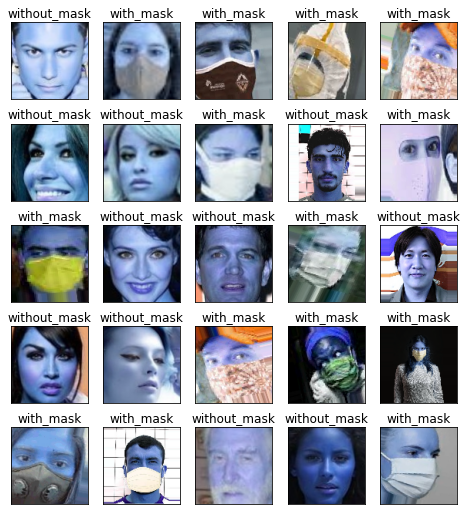

In [8]:
plt.figure(figsize=(8, 9))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    rand_no = random.randint(0, len(train_img))
    plt.title(y[rand_no])
    plt.imshow(train_img[rand_no])

In [9]:
X = np.array(train_img)
X.shape

(11264, 100, 100, 3)

In [10]:
X = X/255.0

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
y_mod = le.fit_transform(y)
Y = to_categorical(y_mod, 2)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2, shuffle=True)

In [14]:
datagen = ImageDataGenerator(
    zoom_range=0.1,
    featurewise_center=False,  
    samplewise_center=False,  
    featurewise_std_normalization=False, 
    samplewise_std_normalization=False, 
    zca_whitening=False,  
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,  
    vertical_flip=False)  
datagen.fit(X_train)

In [15]:
model = Sequential()
weight_decay = 0.0005

model.add(Conv2D(64, (3, 3), padding='same',
                 kernel_regularizer=regularizers.l2(weight_decay), input_shape=X_train.shape[1:],))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
#############################################################################
model.add(Conv2D(64, (3, 3), padding='same',
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding='same',
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#############################################################################
model.add(Conv2D(128, (3, 3), padding='same',
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), padding='same',
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#############################################################################
model.add(Conv2D(256, (3, 3), padding='same',
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#############################################################################
model.add(Conv2D(256, (3, 3), padding='same',
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (3, 3), padding='same',
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#############################################################################
model.add(Conv2D(512, (3, 3), padding='same',
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#############################################################################
model.add(Conv2D(512, (3, 3), padding='same',
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (3, 3), padding='same',
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#############################################################################
model.add(Conv2D(512, (3, 3), padding='same',
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
#############################################################################
model.add(Conv2D(512, (3, 3), padding='same',
                 kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
#############################################################################
model.add(Flatten())
model.add(Dense(512, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))
#############################################################################
learning_rate = 0.1
lr_decay = 1e-6
lr_drop = 20
#############################################################################
sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay,
                     momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(amsgrad=True,lr=0.0015), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy',
              optimizer=sgd, metrics=['accuracy'])

In [16]:
def lr_scheduler(epoch):
    return learning_rate * (0.5 ** (epoch // lr_drop))
reduce_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)

In [17]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

filepath = "basic.hdf5"
checkpoint = ModelCheckpoint(
    filepath, monitor='val_loss', verbose=1, mode='auto', save_best_only=True)

#logdir = os.path.join("logs4_load2", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir, histogram_freq=1)

In [18]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4,
                                               restore_best_weights=True,
                                               verbose=1)

In [19]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=X_train.shape[0] // 32,
                    validation_data=(X_test, y_test),
                    epochs=15,
                    callbacks=[reduce_lr, tensorboard_callback,
                               checkpoint, es_callback],
                    verbose=1)

Epoch 1/15
  1/281 [..............................] - ETA: 0s - loss: 3.9113 - accuracy: 0.5312WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
281/281 [==============================] - ETA: 0s - loss: 83.8985 - accuracy: 0.7994
Epoch 00001: val_loss improved from inf to 66.16466, saving model to basic.hdf5
281/281 [==============================] - 42s 151ms/step - loss: 83.8985 - accuracy: 0.7994 - val_loss: 66.1647 - val_accuracy: 0.8362
Epoch 2/15
281/281 [==============================] - ETA: 0s - loss: 50.5107 - accuracy: 0.8951
Epoch 00002: val_loss improved from 66.16466 to 37.68839, saving model to basic.hdf5
281/281 [==============================] - 42s 148ms/step - loss: 50.5107 - accuracy: 0.8951 - val_loss: 37.6884 - val_accuracy: 0.8491
Epoch 3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


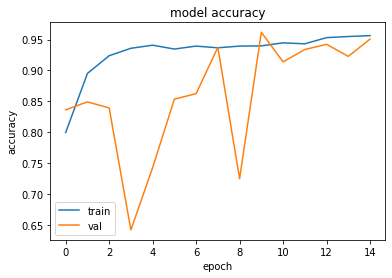

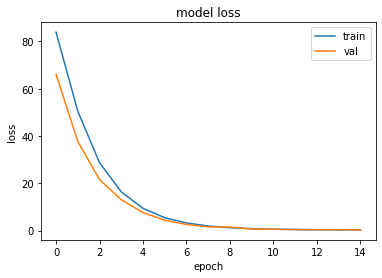

In [20]:
print(history.history.keys())
#  Ploting the accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()
# Ploting the loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

In [21]:
print(model.evaluate(X_test,y_test))

71/71 [==============================] - 3s 37ms/step - loss: 0.3231 - accuracy: 0.9507
[0.3231218755245209, 0.9507323503494263]


In [22]:
model1 = load_model('basic.hdf5')

In [23]:
test_file = pd.read_csv('face_mask_detection/Testing_set_face_mask.csv')
test_img = []
for i in test_file['filename']:
    n = cv2.imread('face_mask_detection/test/'+i)
    # print(i)
    temp = resizing(n)
    test_img.append(temp)

In [24]:
test = np.array(test_img)/255.0

In [28]:
result = pd.DataFrame(le.inverse_transform(np.argmax(model.predict(test), axis=1)))

1400
893
731
871
866
315
1477
689
738
629
1023
726
364
612
376
174
1253
536
1483
133
1336
1007
491
330
1134
465
490
526
212
31
86
1165
276
895
1042
124
333
928
723
942
1318
1463
107
196
945
1244
282
1052
920
1277


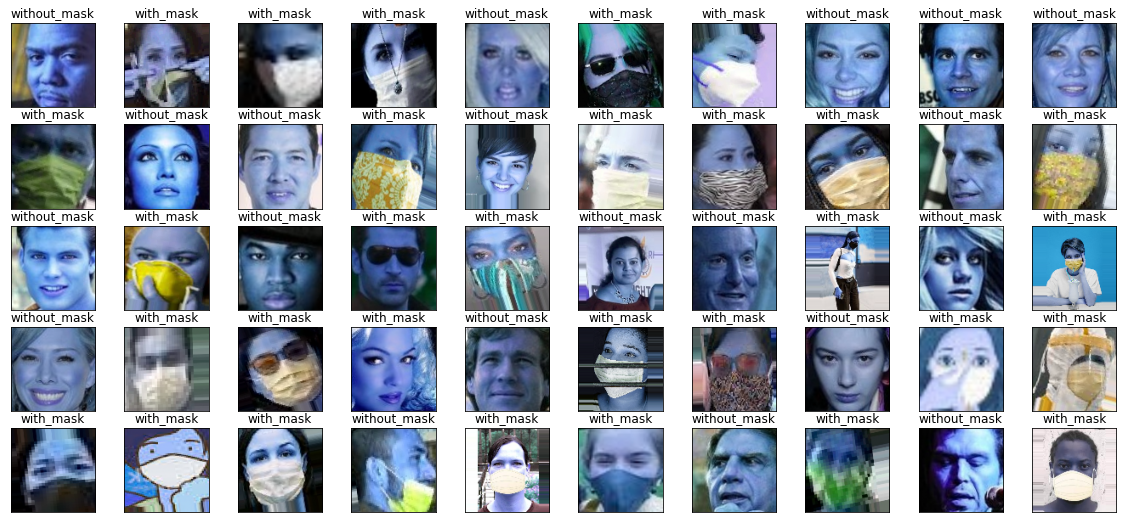

In [30]:
plt.figure(figsize=(20, 9))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    rand_no = random.randint(0, len(test))
    plt.title(result.loc[rand_no][0])
    plt.imshow(test[rand_no])
    print(rand_no)

In [33]:
result.to_csv('/content/drive/My Drive/prediction.csv')